In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2019) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from keras import optimizers

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [6]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


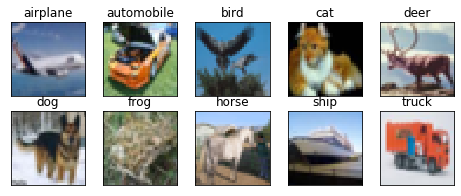

In [7]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# function to calculate accuracy of prediction
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

Following are the regularization techniques and structure specification of the architecture


1.   Using Image Normalization
2.   Making use of Batch Normalization
3.   Making use of L2 Regularizer
4.   Properly using Dropout
5.   Removed Dense layers

In [48]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(10, 1, 1))

model.add(AveragePooling2D(pool_size = (4,4)))
model.add(Flatten())

model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same"

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [0]:
# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# defining the function for adding cutout data-augmentation
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
# code for finding the best learning rate, which will be used as a call back in model.fit function
class LR_Finder(Callback):
    
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

In [33]:
# now running the model with LR_Finder as callback to find the best learning rate
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(train_features.shape[0]/128))
model.fit(train_features, train_labels, callbacks=[lr_finder] )

Epoch 1/1
12736/50000 [======>.......................] - ETA: 48s - loss: 3.8290 - acc: 0.1610

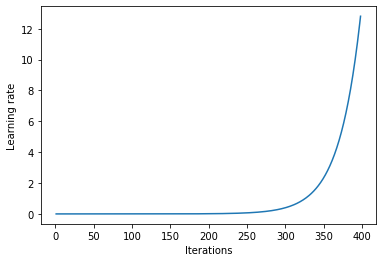

In [34]:
# visualising the graphs to decide on the best learning rate
lr_finder.plot_lr()

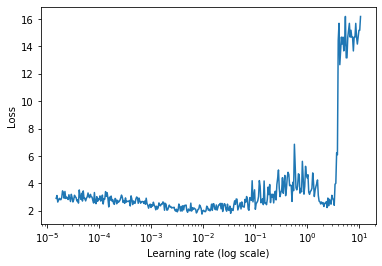

In [35]:
lr_finder.plot()

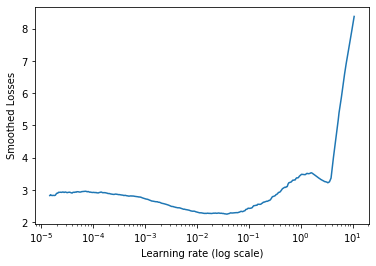

In [36]:
lr_finder.plot_smoothed_loss()


In [0]:
# from the graph above we can see that the loss is abruptly decreasing only when the lr is near 0.001. So, we will be using the same as learning rate

In [0]:
# using sgd with momentum
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
390/390 [==============================] - 30s 76ms/step - loss: 1.7889 - acc: 0.3624 - val_loss: 1.5144 - val_acc: 0.4688
Epoch 2/100
390/390 [==============================] - 26s 68ms/step - loss: 1.4673 - acc: 0.4838 - val_loss: 1.3627 - val_acc: 0.5219
Epoch 3/100
390/390 [==============================] - 26s 67ms/step - loss: 1.3340 - acc: 0.5351 - val_loss: 1.3448 - val_acc: 0.5487
Epoch 4/100
390/390 [==============================] - 26s 68ms/step - loss: 1.2338 - acc: 0.5706 - val_loss: 1.1181 - val_acc: 0.6148
Epoch 5/100
390/390 [==============================] - 26s 67ms/step - loss: 1.1646 - acc: 0.5964 - val_loss: 1.1255 - val_acc: 0.6164
Epoch 6/100
390/390 [==============================] - 26s 68ms/step - loss: 1.1124 - acc: 0.6178 - val_loss: 1.2267 - val_acc: 0.5962
Epoch 7/100
390/390 [==============================] - 27s 68ms/step - loss: 1.0665 - acc: 0.6342 - val_loss: 0.9498 - val_acc: 0.6766
Epoch 8/100
390/390 [==============================] - 

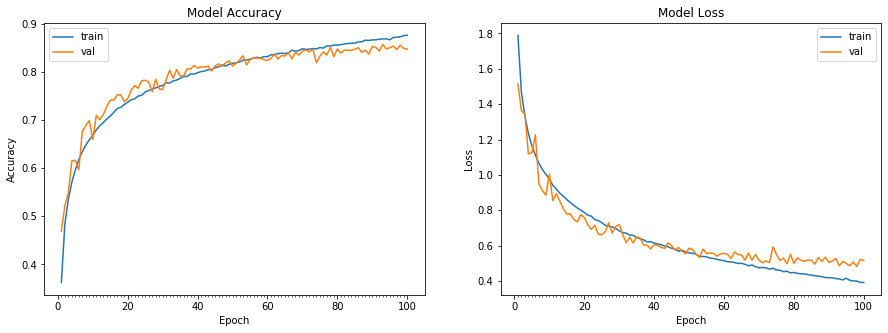

Accuracy on test data is: 84.71


In [50]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Code to find the misclassified images

In [0]:
test_datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

In [0]:
# getting the prediction on test data
prediction = model.predict(test_features)

In [0]:
# getting the class from the prediction
prediction = np.argmax(prediction, axis=1)

In [0]:
# getting the ground truth class from the test set like the prediction
test_labels_class = np.argmax(test_labels, axis=1)

In [55]:
test_labels_class

array([3, 8, 8, ..., 5, 1, 7])

In [56]:
prediction

array([3, 8, 8, ..., 5, 1, 7])

In [78]:
prediction[:100]

array([3, 8, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 6, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 3, 4, 9, 9, 5, 4, 6, 3, 6,
       0, 9, 4, 9, 7, 6, 9, 8, 7, 3, 8, 8, 7, 7, 3, 6, 7, 5, 6, 3, 6, 2,
       1, 2, 3, 7, 2, 3, 8, 8, 0, 2, 9, 3, 5, 8, 8, 1, 1, 7, 2, 5, 3, 7,
       8, 9, 0, 3, 8, 6, 4, 6, 6, 2, 2, 7])

In [0]:
# finding the index number of the images for which the prediction is wrong from the ground truth
wrong_indices = [i for i in range(len(prediction)) if prediction[i] != test_labels_class[i]]

In [80]:
len(wrong_indices)

1529

#### Running GradCam on first 25 misclassified images

In [0]:
# importing libraries for GradCAM
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
import os
from skimage import io
from google.colab.patches import cv2_imshow

In [72]:
images = [(index,test_features[index]) for index in wrong_indices[:25]]
len(images)

25

In [70]:
model.get_layer("conv2d_62")

In [83]:
for image_tuple in images:
  img = image_tuple[1]
  # pre-processing for the images
  x = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(x)
  x = np.expand_dims(x,axis=0)    # Since we are passing only one image through the network, it’s required to expand the first dimension noting it as a batch of size 1

  # predicting the output of the image
  preds = model.predict(x)    # predicting the output on the trained model
  class_idx = np.argmax(preds[0])   # index for the predicted class
  class_output = model.output[:, class_idx]   # output from the model in tensor form, which will be used for calculating gradient for gradcam

  # selecting the layer whose features will be used for gradient calculation
  last_conv_layer = model.get_layer("conv2d_62")
  # last_conv_layer = model.layers[-8]

  # calculating the gradients
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(256):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # heatmap
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # visualizing the heatmap along with the original image
  img = (img * 255).round().astype(np.uint8)
  img = cv2.resize(img, (224, 224))
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

  print("predicted image class is {}, while the ground truth is {}".format(class_names[class_idx], class_names[test_labels_class[image_tuple[0]]]))
  cv2_imshow(img)
  cv2_imshow(superimposed_img)

Output hidden; open in https://colab.research.google.com to view.

##### Due to some reason the GradCAM output for 25 misclassified images are not visible in github. 
Please use this link to directly open it in google colab to see the output.
[colab link](https://colab.research.google.com/drive/1i9zKW4oy3GctXtBu_f7hmkzzp3jMxNBR)